<a href="https://colab.research.google.com/github/FatemehAbediK/image-processing/blob/main/brain_tumor_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##if you have a data set  brain tumor on pc:
"""
have a yaml file in pc:copy the path of the dataset in vscode!
path:
train:train/images
valid:valid/images
test:

#labels#

names:
0:negative
1:positive
"""

In [2]:
!pip install roboflow
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 26.1 MB/s eta 0:00:00


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#now let's just use roboflow dataset:

first way

In [ ]:
"""
from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("brain-tumormritest").project("brain-tumor-mri-test")
version = project.version(2)
dataset = version.download("yolov7")
"""

In [ ]:
print(project)
print(version)

second way

In [7]:
dataset_path='/content/drive/MyDrive/dataset files/roboflow-braintumor-yolov7'

In [8]:
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7

# Install necessary dependencies
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 22.59 MiB/s, done.
Resolving deltas: 100% (519/519), done.
/content/yolov7
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 93.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.18.0 requires n

In [9]:
# Start training YOLOv7
!python train.py --img 640 \
                 --batch 16 \
                 --epochs 10 \
                 --data '/content/drive/MyDrive/dataset files/roboflow-braintumor-yolov7/data.yaml' \
                 --weights yolov7.pt \
                 --device 0


2024-09-29 13:04:07.800977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 13:04:07.841059: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 13:04:07.852757: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 13:04:07.881876: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-29 13:04:11.071192: W tensorflow/comp

In [18]:
#check on validation set
!python test.py --data '/content/drive/MyDrive/dataset files/roboflow-braintumor-yolov7/data.yaml' \
                --img 640 \
                --batch 16 \
                --conf 0.25 \
                --iou 0.45 \
                --weights '/content/yolov7/runs/train/exp/weights/best.pt' \
                --device 0


Namespace(weights=['/content/yolov7/runs/train/exp/weights/best.pt'], data='/content/drive/MyDrive/dataset files/roboflow-braintumor-yolov7/data.yaml', batch_size=16, img_size=640, conf_thres=0.25, iou_thres=0.45, task='val', device='0', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.4.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits

In [21]:
!ls runs/test/exp2


confusion_matrix.png  test_batch0_labels.jpg  test_batch0_pred.jpg


In [34]:
# Inference on test set
!python detect.py --weights '/content/yolov7/runs/train/exp/weights/best.pt' \
                  --img 640 \
                  --conf 0.25 \
                  --source '/content/drive/MyDrive/dataset files/roboflow-braintumor-yolov7/test/images/'


Namespace(weights=['/content/yolov7/runs/train/exp/weights/best.pt'], source='/content/drive/MyDrive/dataset files/roboflow-braintumor-yolov7/test/images/', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.4.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be 

In [23]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2
import os

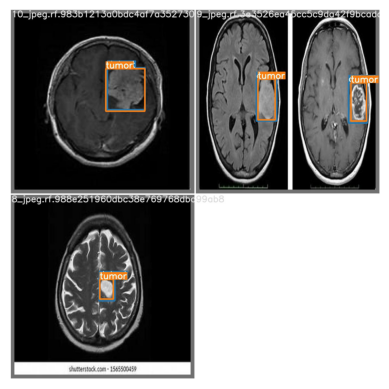

In [24]:
img = cv2.imread('/content/yolov7/runs/test/exp2/test_batch0_labels.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show();

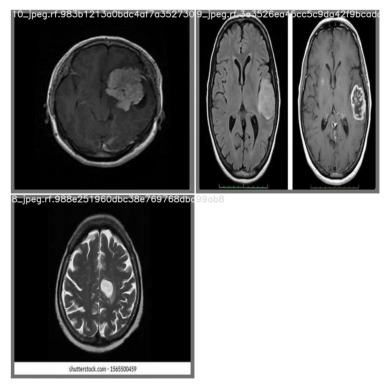

In [25]:
img = cv2.imread('/content/yolov7/runs/test/exp2/test_batch0_pred.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

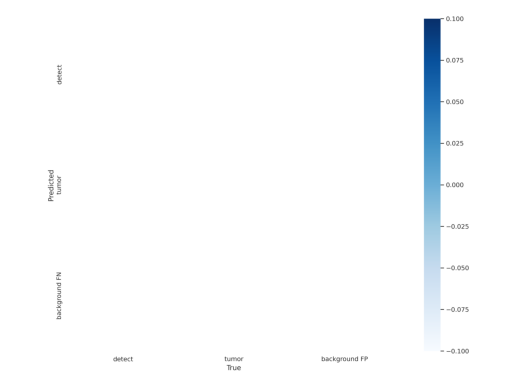

In [39]:
img = cv2.imread('/content/yolov7/runs/test/exp2/confusion_matrix.png')

# Convert the image from BGR (OpenCV format) to RGB (for matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the confusion matrix image
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.show()

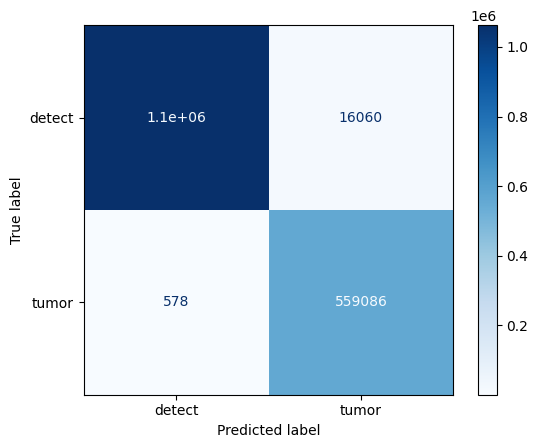

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import cv2

y_true_img = cv2.imread('/content/yolov7/runs/test/exp2/test_batch0_pred.jpg', cv2.IMREAD_GRAYSCALE)
y_pred_img = cv2.imread('/content/yolov7/runs/test/exp2/test_batch0_labels.jpg', cv2.IMREAD_GRAYSCALE)


y_true = np.where(y_true_img > 128, 1, 0)  # Convert to binary array based on intensity
y_pred = np.where(y_pred_img > 128, 1, 0)

y_true = y_true.flatten()
y_pred = y_pred.flatten()

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['detect', 'tumor'])
disp.plot(cmap='Blues')

plt.show()

In [11]:
#if you want to use yolov10 and change some hyperparameters :
"""

from ultralytics import YOLO

model = YOLO("yolov10n.yaml")  # build a new model from scratch
model = YOLO("yolov10n.pt")    # load a pretrained model


# Define custom training parameters
params = {
    'data': '/content/brain-tumor-MRI-test-1/data.yaml'
    'epochs': 10,
    'imgsz': 640,            # Image size
    'cache': False,          # Enable caching
    'patience': 10,
    'lr0': 0.01,             # Initial learning rate
    'lrf': 0.001,            # Final learning rate
    'degrees': 0.0,          # Image augmentation (rotation)
    'translate': 0.1,        # Image augmentation (translation)
    'scale': 0.5,            # Image augmentation (scale)
    'shear': 0.0,            # Image augmentation (shear)
    'perspective': 0.0,      # Image augmentation (perspective)
    'flipud': 0.0,           # Image augmentation (vertical flip)
    'fliplr': 0.5,           # Image augmentation (horizontal flip)
}

# Train the model with custom parameters
model.train(**params)
"""

'\n\nfrom ultralytics import YOLO\n\nmodel = YOLO("yolov10n.yaml")  # build a new model from scratch\nmodel = YOLO("yolov10n.pt")    # load a pretrained model\n\n\n# Define custom training parameters\nparams = {\n    \'data\': \'/content/brain-tumor-MRI-test-1/data.yaml\'\n    \'epochs\': 10,\n    \'imgsz\': 640,            # Image size\n    \'cache\': False,          # Enable caching\n    \'patience\': 10,\n    \'lr0\': 0.01,             # Initial learning rate\n    \'lrf\': 0.001,            # Final learning rate\n    \'degrees\': 0.0,          # Image augmentation (rotation)\n    \'translate\': 0.1,        # Image augmentation (translation)\n    \'scale\': 0.5,            # Image augmentation (scale)\n    \'shear\': 0.0,            # Image augmentation (shear)\n    \'perspective\': 0.0,      # Image augmentation (perspective)\n    \'flipud\': 0.0,           # Image augmentation (vertical flip)\n    \'fliplr\': 0.5,           # Image augmentation (horizontal flip)\n}\n\n# Train the m